# Business Understanding

## Project Domain

Domain: Agriculture & Food Safety,
Sub-Domain: Smart Foraging & Toxicity Detection Systems

Klasifikasi jamur termasuk dalam bidang pertanian dan keamanan pangan, yang memanfaatkan machine learning dan Artificial Neural Network (ANN) untuk membantu membedakan jamur yang dapat dimakan dengan yang beracun secara otomatis, cepat, dan akurat.

## Problem Statements

Masalah yang Dihadapi:

1. Kesalahan Identifikasi Jamur
Banyak jamur yang tampak serupa secara visual tetapi berbeda secara toksikologis. Kesalahan identifikasi oleh petani, pemetik jamur, atau konsumen dapat berakibat fatal.

2. Kurangnya Akses ke Ahli Mikologi
Tidak semua orang memiliki pengetahuan atau akses ke pakar jamur untuk memastikan keamanan konsumsi jamur yang dikumpulkan.

3. Identifikasi Manual yang Memakan Waktu dan Risiko Tinggi
Metode identifikasi konvensional (dengan buku panduan atau observasi langsung) sangat rawan kesalahan dan tidak efisien di lapangan.

4. Kebutuhan Akan Sistem Dukungan Keputusan
Dibutuhkan sistem cerdas yang mampu memberikan prediksi keamanan konsumsi jamur dengan mengandalkan data fitur fisik seperti bentuk tudung, warna insang, bau, dan lainnya.








## Goals

Membangun sistem klasifikasi jamur berbasis Artificial Neural Network (ANN) yang dapat:

- Memprediksi apakah jamur dapat dimakan (edible) atau beracun (poisonous) berdasarkan fitur-fitur seperti warna tudung, bentuk batang, bau, dan lainnya.

- Memberikan alternatif sistem identifikasi yang dapat diakses secara luas dan tidak bergantung pada keahlian manual.

- Meningkatkan keamanan publik dengan mengurangi risiko konsumsi jamur beracun.



## Solution Statements

Model Machine Learning Berbasis Artificial Neural Network (ANN)

1. Dataset akan dipreproses menggunakan teknik encoding label dari simbol menjadi deskripsi. ANN dilatih untuk mempelajari pola kompleks dalam data dan melakukan klasifikasi antara jamur edible dan poisonous dengan akurasi tinggi.

2. Implementasi dalam Aplikasi Web atau Mobile
Model ANN dapat diintegrasikan ke dalam antarmuka sederhana (seperti Streamlit atau aplikasi Android) untuk memberikan hasil prediksi langsung di lapangan.

3. Optimasi dan Generalisasi Model
Model akan diuji, divalidasi, dan disesuaikan agar mampu menangani data baru dan variatif, serta dapat diadaptasi untuk sistem cerdas lainnya di bidang pertanian dan keamanan pangan.

# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kanaaaaw","key":"f68976c0e4ea264b7e0d9cbcb478d96e"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d uciml/mushroom-classification

Dataset URL: https://www.kaggle.com/datasets/uciml/mushroom-classification
License(s): CC0-1.0
  0% 0.00/34.2k [00:00<?, ?B/s]
100% 34.2k/34.2k [00:00<00:00, 141MB/s]


In [4]:
!mkdir mushroom-classification
!unzip mushroom-classification.zip -d mushroom-classification
!ls mushroom-classification

Archive:  mushroom-classification.zip
  inflating: mushroom-classification/mushrooms.csv  
mushrooms.csv


## Import Library yang dibutuhkan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import warnings
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
warnings.filterwarnings('ignore')


plt.style.use('ggplot')
sns.set_palette("viridis")


plt.rcParams['figure.figsize'] = (14, 8)

## Exploratory Data Analysis

In [6]:

df = pd.read_csv('mushroom-classification/mushrooms.csv')

values = {"b": "bell", "c": "conical", "x": "convex", "f": "flat", "k": "knobbed", "s": "sunken"}
df["cap-shape"] = df["cap-shape"].replace(values)
values2 = {"f": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth"}
df["cap-surface"] = df["cap-surface"].replace(values2)
values3 = {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "r": "green", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow"}
df["cap-color"] = df["cap-color"].replace(values3)
values4 = {"a": "almond", "l": "anise", "c": "creosote", "y": "fishy", "f": "foul", "m": "musty", "n": "none", "p": "pungent", "s": "spicy"}
df["odor"] = df["odor"].replace(values4)
values5 = {"a": "attached", "f": "free"}
df["gill-attachment"] = df["gill-attachment"].replace(values5)
values6 = {"c": "close", "w": "crowded"}
df["gill-spacing"] = df["gill-spacing"].replace(values6)
values7 = {"b": "broad", "n": "narrow"}
df["gill-size"] = df["gill-size"].replace(values7)
values8 = {"k": "black", "b": "buff", "n": "brown", "h": "chocolate", "g": "gray", "r": "green", "o": "orange", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow"}
df["gill-color"] = df["gill-color"].replace(values8)
values9 = {"t": "tapering", "e": "enlarging"}
df["stalk-shape"] = df["stalk-shape"].replace(values9)
values10 = {"b": "bulbous", "c": "club", "e": "equal", "z": "rhizomorphs", "r": "rooted", "?": "missing"}
df["stalk-root"] = df["stalk-root"].replace(values10)
values11 = {"s": "smooth", "k": "silky", "f": "fibrous", "y": "scaly"}
df["stalk-surface-above-ring"] = df["stalk-surface-above-ring"].replace(values11)
df["stalk-surface-below-ring"] = df["stalk-surface-below-ring"].replace(values11)
values12 = {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "p": "pink", "e": "red", "w": "white", "y": "yellow", "o": "orange"}
df["stalk-color-above-ring"] = df["stalk-color-above-ring"].replace(values12)
df["stalk-color-below-ring"] = df["stalk-color-below-ring"].replace(values12)
veil_type = {"p": "partial", "u": "universal"}
df["veil-type"] = df["veil-type"].replace(veil_type)
veil_color = {"n": "brown", "o": "orange", "w": "white", "y": "yellow"}
df["veil-color"] = df["veil-color"].replace(veil_color)
ring_number = {"n": "none", "o": "one", "t": "two"}
df["ring-number"] = df["ring-number"].replace(ring_number)
ring_type = {"c": "cobwebby", "e": "evanescent", "f": "flaring", "l": "large", "n": "none", "p": "pendant", "s": "sheathing", "z": "zone"}
df["ring-type"] = df["ring-type"].replace(ring_type)
spore_print_color = {"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "r": "green", "o": "orange", "u": "purple", "w": "white", "y": "yellow"}
df["spore-print-color"] = df["spore-print-color"].replace(spore_print_color)
population = {"a": "abundant", "c": "clustered", "n": "numerous", "s": "scattered", "v": "several", "y": "solitary"}
df["population"] = df["population"].replace(population)
habitat = {"g": "grasses", "l": "leaves", "m": "meadows", "p": "paths", "u": "urban", "w": "waste", "d": "woods"}
df["habitat"] = df["habitat"].replace(habitat)
bruises = {"t": "bruises", "f": "no"}
df["bruises"] = df["bruises"].replace(bruises)


In [7]:
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,e,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,e,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,p,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,e,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


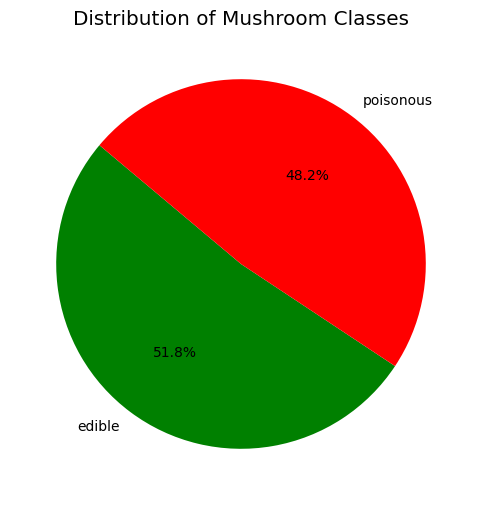

In [8]:
class_labels = {'e': 'edible', 'p': 'poisonous'}
value_counts = df['class'].value_counts()
percentages = 100 * value_counts / len(df)

# Konversi index angka ke label
labels = [class_labels[i] for i in value_counts.index]

plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title('Distribution of Mushroom Classes')
plt.show()

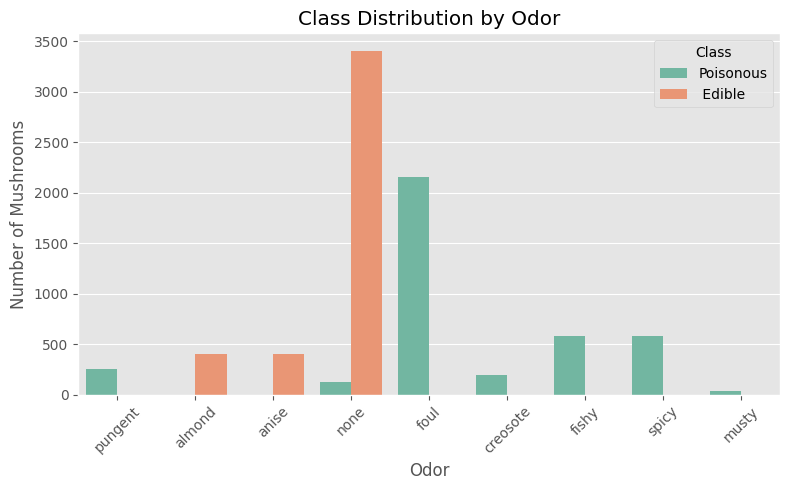

In [9]:


plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='odor', hue='class', palette='Set2')
plt.title('Class Distribution by Odor')
plt.xlabel('Odor')
plt.ylabel('Number of Mushrooms')


legend_labels = {'e': ' Edible', 'p': 'Poisonous'}

handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels]
plt.legend(handles, new_labels, title='Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

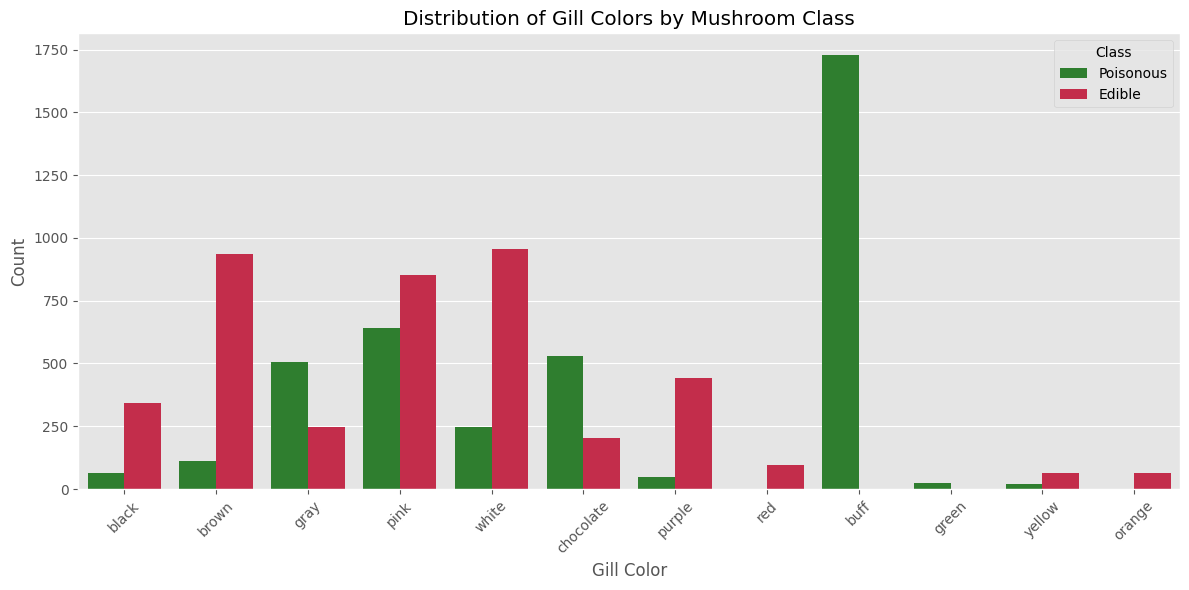

In [10]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='gill-color', hue='class', palette=['forestgreen', 'crimson'])


class_mapping = {'e': 'Edible', 'p': 'Poisonous'}
handles, labels = ax.get_legend_handles_labels()
new_labels = [class_mapping[lbl] for lbl in labels]
ax.legend(handles, new_labels, title='Class')

plt.title('Distribution of Gill Colors by Mushroom Class')
plt.xlabel('Gill Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


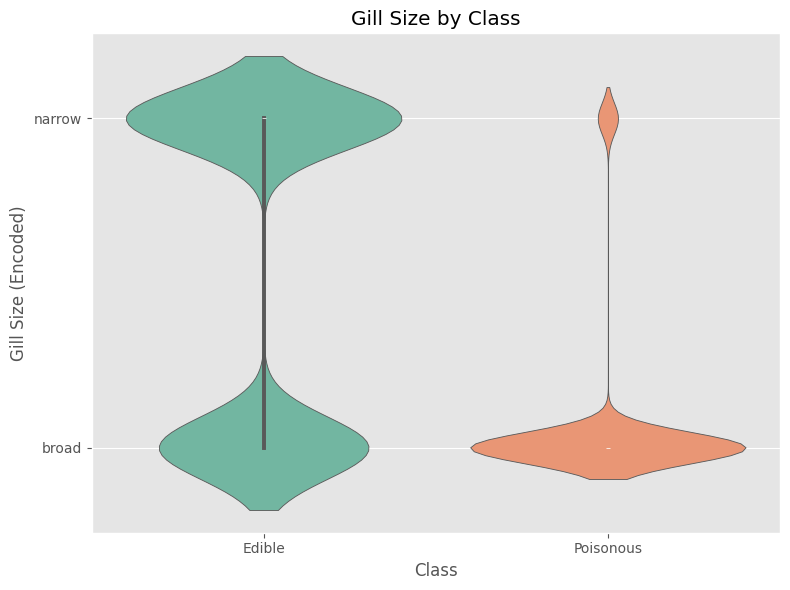

In [11]:

plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='class', y='gill-size', palette='Set2')

plt.title('Gill Size by Class')
plt.xlabel('Class')
plt.ylabel('Gill Size (Encoded)')
plt.xticks([0, 1], ['Edible', 'Poisonous'])  # Ganti label class
plt.tight_layout()
plt.show()


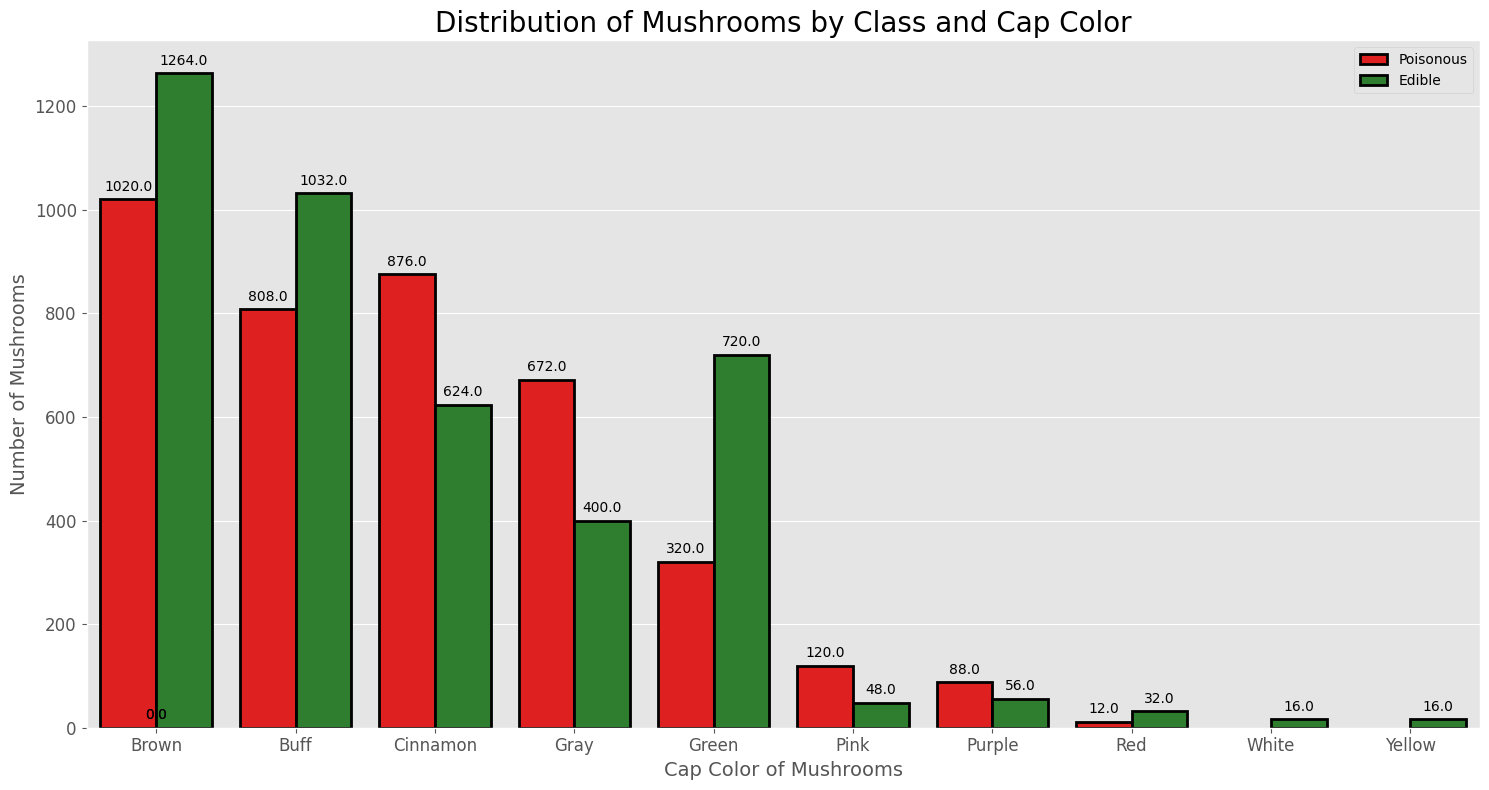

In [12]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(
    data=df,
    x='cap-color',
    hue='class',
    order=df['cap-color'].value_counts().index,
    palette=['red', 'forestgreen'],
    edgecolor=(0, 0, 0),
    linewidth=2
)

# Ganti label sumbu X agar readable
splot.set_xticklabels([
    'Brown', 'Buff', 'Cinnamon', 'Gray', 'Green', 'Pink', 'Purple', 'Red', 'White', 'Yellow'
])

# Tambahkan label jumlah di atas setiap batang
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

# Penyesuaian legend dan label
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of Mushrooms', fontsize=14)
plt.xlabel('Cap Color of Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of Mushrooms by Class and Cap Color', fontsize=20)
plt.tight_layout()
plt.show()



# Data Preparation

In [13]:

single_value_columns = []
for col in df.columns:
    if df[col].nunique() == 1:
        print(f"Column {col} has only one value: {df[col].unique()[0]}")
        single_value_columns.append(col)

Column veil-type has only one value: partial


In [14]:
if 'veil-type' in df.columns:

    df = df.drop('veil-type', axis=1)
    print("veil-type column dropped")
else:
    print("veil-type column not found in the DataFrame")

veil-type column dropped


In [15]:
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [16]:
X = df.drop('class', axis=1)
y = df['class']

In [17]:

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (6499, 21)
Testing set shape: (1625, 21)


# Modeling

In [19]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(len(le.classes_), activation="softmax")
])

In [20]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,383 (52.28 KB)

 Trainable params: 13,383 (52.28 KB)

 Non-trainable params: 0 (0.00 B)

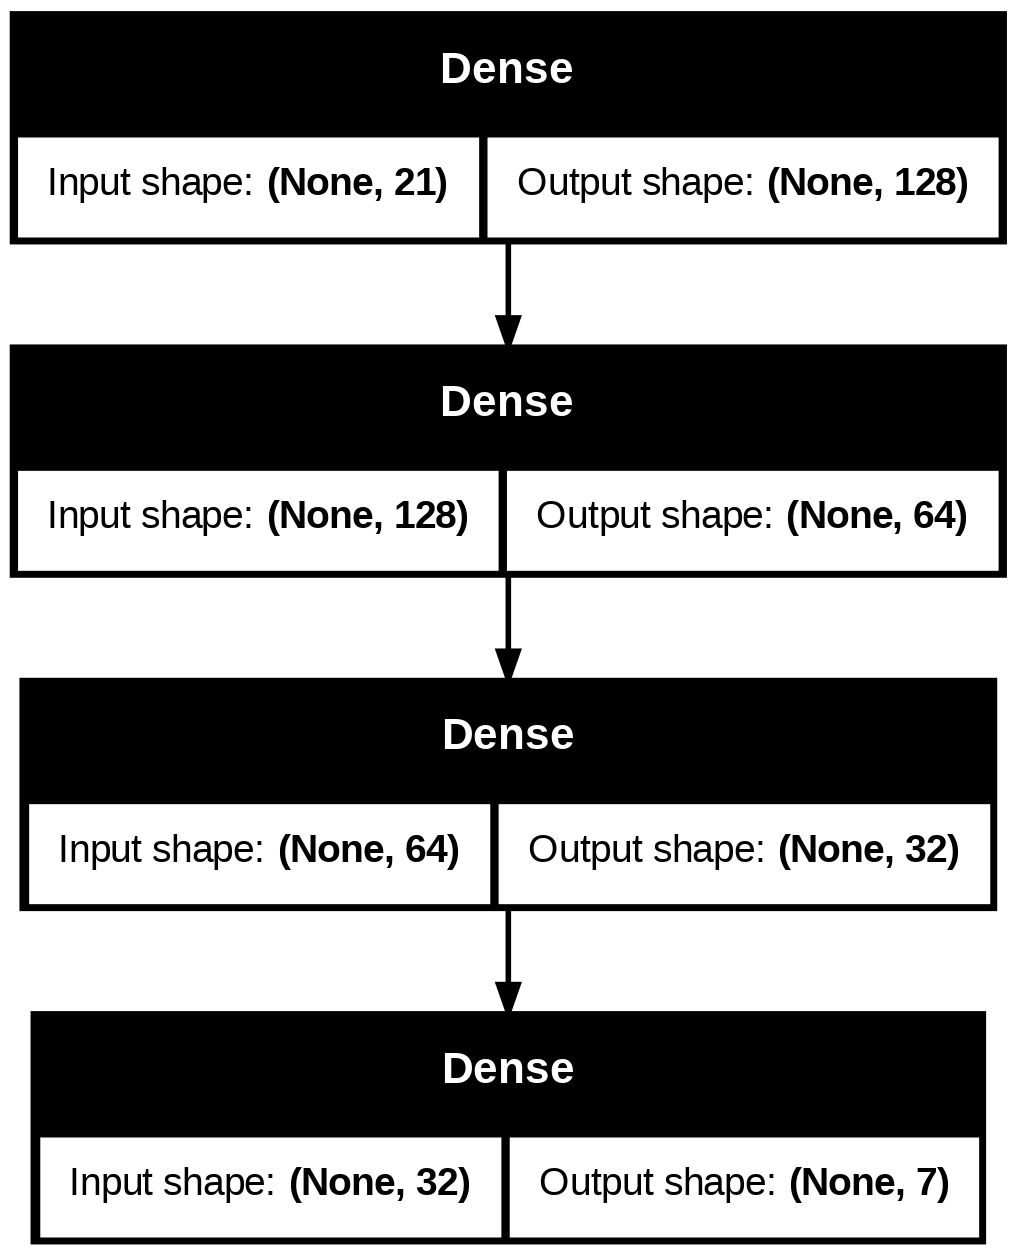

In [22]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [23]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(X_test, y_test))

Epoch 1/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8435 - loss: 0.4527 - val_accuracy: 0.9735 - val_loss: 0.0668
Epoch 2/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9934 - loss: 0.0236 - val_accuracy: 0.9914 - val_loss: 0.0203
Epoch 3/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9968 - loss: 0.0107 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 4/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 6.7435e-04
Epoch 5/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 4.6795e-04 - val_accuracy: 1.0000 - val_loss: 3.7666e-04
Epoch 6/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9988 - loss: 0.0037 - val_accuracy: 0.9945 - val_loss: 0.0120
Epoch 7/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9971 - loss: 0.0098 - val_accuracy: 1.0000 - val_loss: 3.9958e-04
Epoch 8/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.4542e-0

# Evaluation

In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy * 100:.2f}%")
print(f"Loss Model: {test_loss:.4f}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 1.7850e-09
Akurasi Model: 100.00%
Loss Model: 0.0000


In [25]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

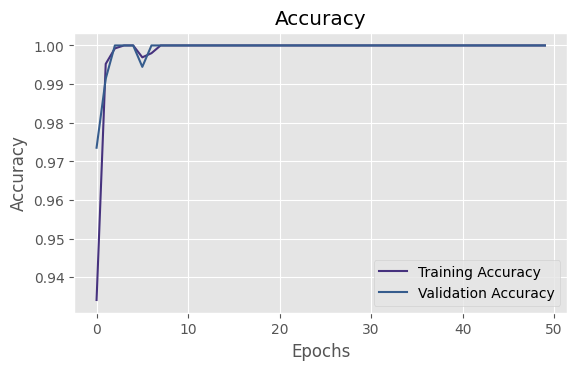

In [26]:
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

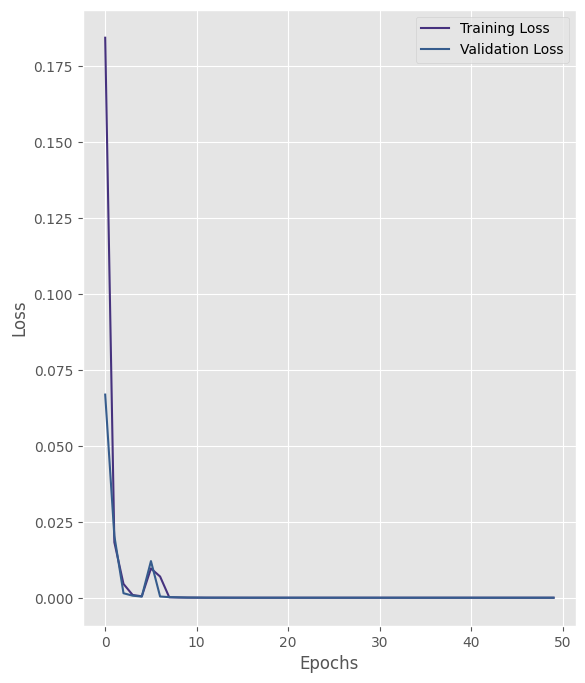

In [27]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


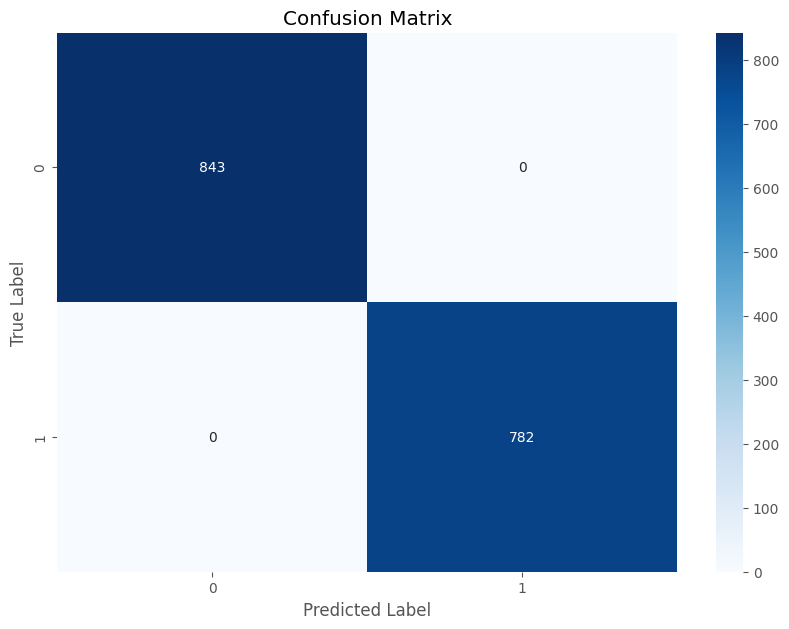

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [28]:
from sklearn.metrics import confusion_matrix, classification_report # Import necessary functions

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes) # Now you can use confusion_matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes)) # And classification_report

# Deployment

## Model Simulation

In [29]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,3,7,7,2,1,4,0,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,3,7,7,2,1,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,3,7,7,2,1,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,3,7,7,2,1,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,3,7,7,2,1,0,1,0,0


In [30]:
print(X.columns.tolist())

['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [31]:
sample_input = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
sample_input_df = pd.DataFrame(sample_input)

In [32]:
sample_input_scaled = scaler.transform(sample_input_df)

In [33]:
predicted_class = np.argmax(model.predict(sample_input_scaled), axis=1)[0]
predicted_label = label_encoders['class'].inverse_transform([predicted_class])
print(f"Hasil prediksi klasifikasi jamur: {predicted_label[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
Hasil prediksi klasifikasi jamur: p


## Save Model

In [34]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model
with open('Jamur.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp3hcr2n1n'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 21), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  132703189577232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132703189578384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132703189575120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132703189577808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132703189575312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132703189578000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132703189568592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132703189574160: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [35]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']